In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [6]:
import astropy.cosmology as cosmo
from astropy.cosmology import Planck15
import astropy.units as u
import h5py
import model
import pymc3 as pm
import theano
import theano.tensor as tt
from scipy.interpolate import interp1d
import seaborn as sns

sns.set_context('notebook')
sns.set_style('ticks')
sns.set_palette('colorblind')

In [3]:
samples = {}
with h5py.File('observations.h5', 'r') as f:
    for k in ['m1det', 'm2det', 'dl']:
        samples[k] = array(f['posteriors'][k])

In [4]:
sel = {}
with h5py.File('selected.h5', 'r') as f:
    sel['m1det'] = array(f['m1det'])
    sel['m2det'] = array(f['m2det'])
    sel['dldet'] = array(f['dl'])
    sel['wtdet'] = array(f['wt'])
    sel['N_gen'] = f.attrs['N_gen']

In [5]:
nobs = 64
nsamp = 128
nsel = 8291
Tobs = 0.5/12.0

m = model.make_model(samples['m1det'][:nobs,:nsamp], samples['m2det'][:nobs,:128], samples['dl'][:nobs,:128], sel['m1det'][:nsel], sel['m2det'][:nsel], sel['dldet'][:nsel], sel['wtdet'][:nsel], sel['N_gen']*nsel/float(len(sel['wtdet'])), Tobs)

In [8]:
with m:
    chain = pm.sample(draws=100, tune=100, cores=4)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [dls, m2_fracs, m1s, w, H0, Om, gamma, beta, alpha, R0, MMax, MMin, sigma_high, sigma_low]
Sampling 4 chains:  80%|████████  | 643/800 [21:51<1:01:16, 23.42s/draws]
The acceptance probability does not match the target. It is 0.9999954962016155, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.


In [9]:
pm.summary(chain)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
sigma_low,0.126301,0.071816,0.008131,0.054053,0.202032,1.007376,39.486886
sigma_high,0.117018,0.018746,0.002123,0.097095,0.136328,1.007174,42.078252
MMin,7.563563,0.176758,0.020012,7.380525,7.754043,1.008462,24.438452
MMax,52.212216,3.892738,0.440762,48.280503,56.160927,1.006591,99.877333
R0,140.059843,75.306874,8.526803,64.289935,216.512809,1.006568,113.645435
alpha,0.036378,1.225222,0.138729,-1.199640,1.275506,1.006483,205.031080
beta,0.655929,0.676375,0.076584,-0.040202,1.350141,1.006694,73.472889
gamma,2.154673,0.469137,0.053119,1.679219,2.633184,1.006533,128.877535
Om,0.011286,0.014659,0.001658,0.000893,0.025725,2.340847,1.470390
H0,51.070944,0.940006,0.104084,50.481854,52.060745,6.701894,1.106457


/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/Users/wfarr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` inst

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c8f2f8400>,
      dtype=object)

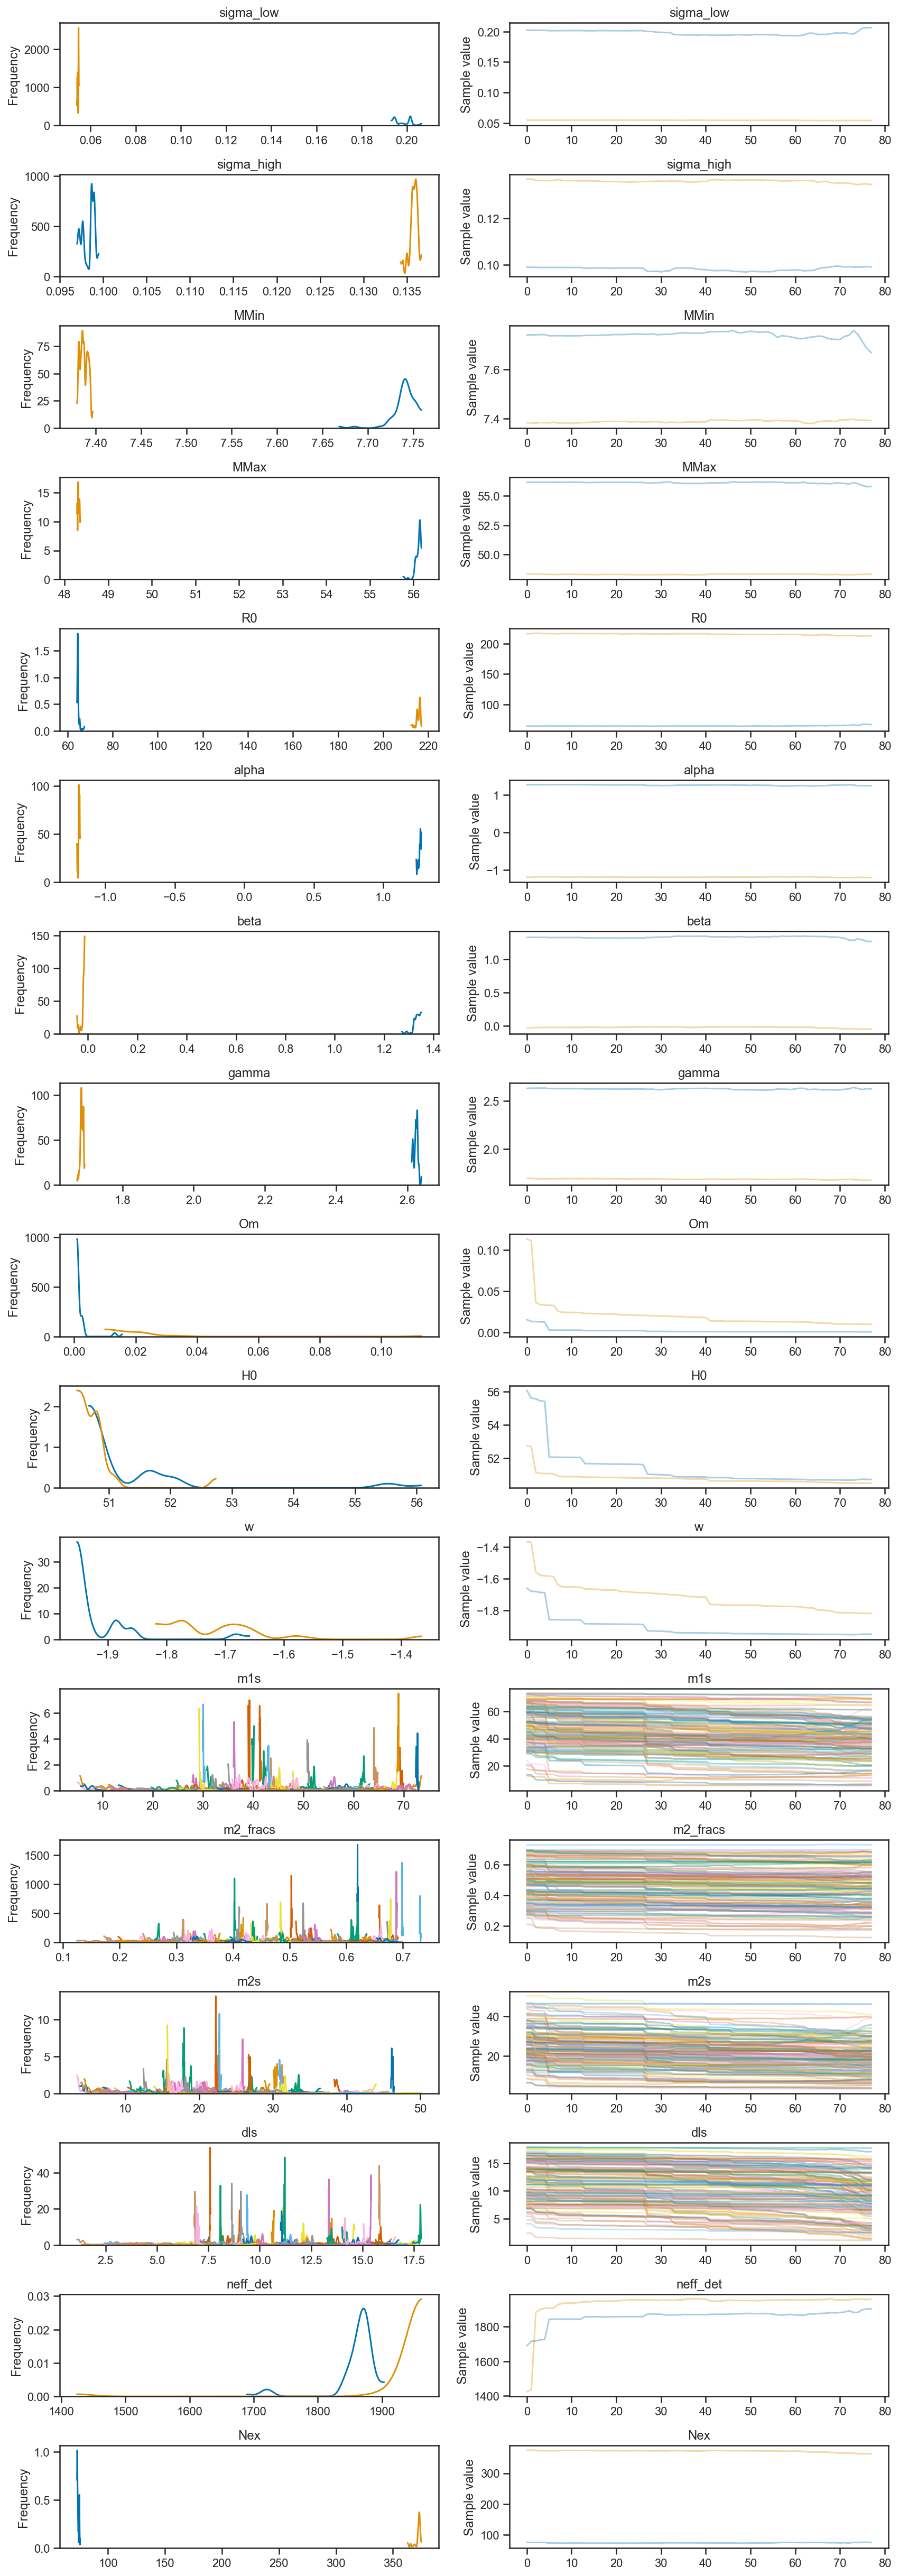

In [10]:
pm.traceplot(chain)